### Group Members:
* Courtney Mueller
* Angel Camacho
* Matthew Grover

In [1]:
# importing potentially necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt

***
## First Dataset: [FirstDataset](https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset/code?resource=download)
#### Display information about rows and columns in dataset:

In [1]:
df1 = pd.read_csv('game_info.csv') # read in the dataset
print("shape: ", df1.shape) # display dataset information
df1.head() # print first few lines of dataset#
df1

NameError: name 'pd' is not defined

#### Table displaying information for genre:
The above dataset information about various video game titles including its publisher and development company. Below we plot this information and display genre frequency. We base this upon the genre count information given in the dataset as well. Based on the data gathered in our dataset it can be determined that we have a sufficient amount of information on the game titles given in order to produce recommendations

In [2]:
# Table dispaying information for genre
sns.set(rc={"figure.figsize":(20, 20)}) #width = 8, height = 4
ax = sns.countplot(x="genres",data=df1)

NameError: name 'sns' is not defined


## Second Dataset: [SecondDataset](https://www.kaggle.com/datasets/gregorut/videogamesales)
#### Display information about rows and columns in dataset:

In [4]:
df2 = pd.read_csv('vgsales.csv') # read in the dataset
print("shape: ",df2.shape) # display dataset information
df2.head() # print first few lines of dataset

shape:  (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Table displaying the information based on genre:
The dataset includes information about the number of sales as well as genre of game and platform the game is played on. We will utilize the information about both genre and number of sales, tying the two aspects together in attempt to make connections to make recommendations to users.

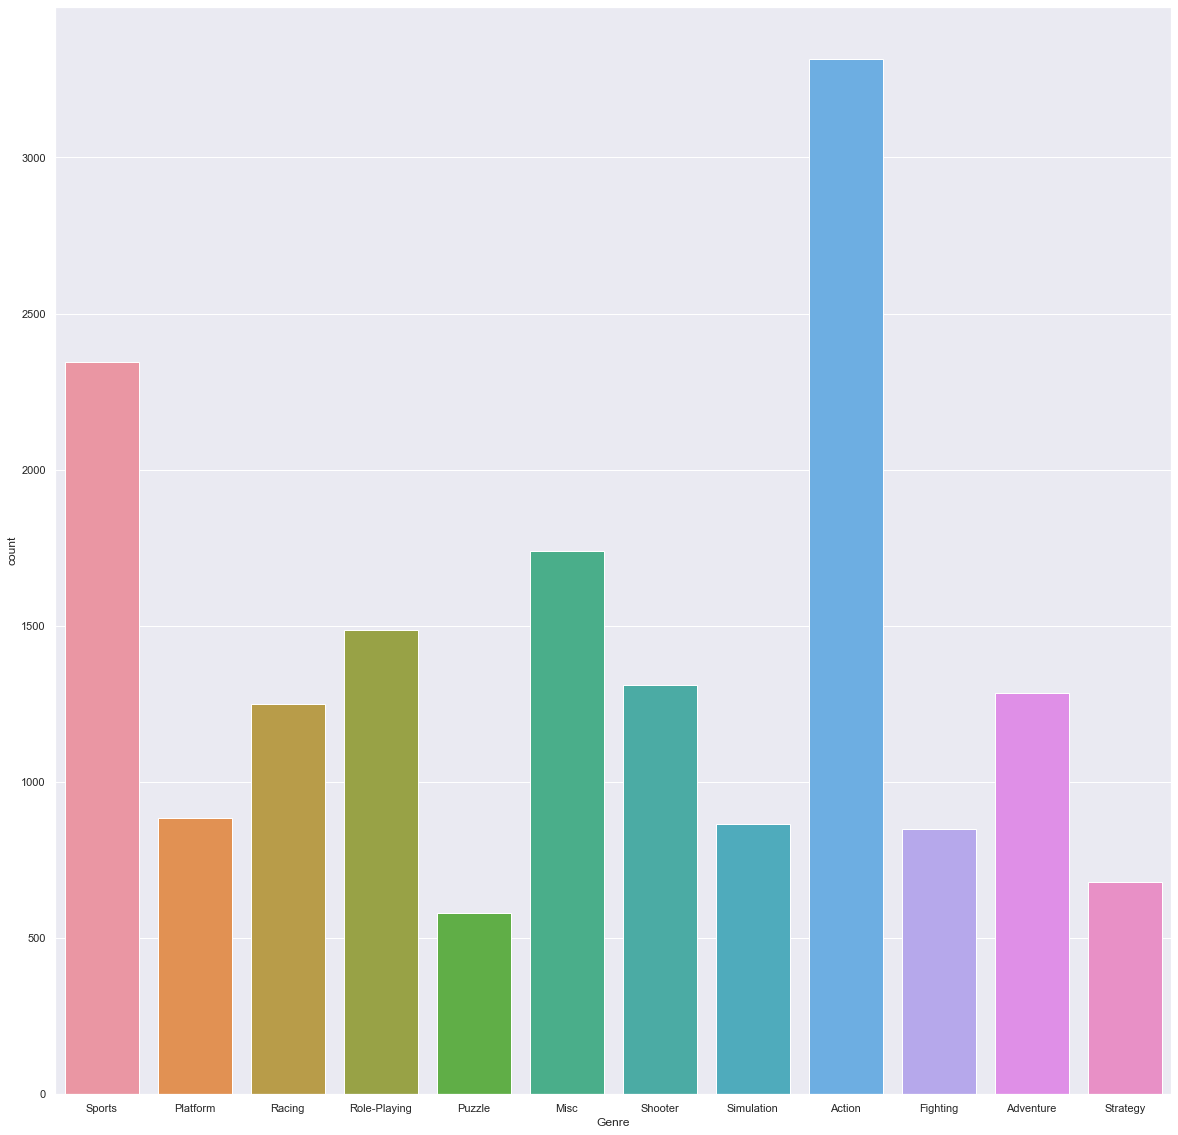

In [5]:
# Table dispaying information for genre
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4
ax = sns.countplot(x="Genre",data=df2)


# **Analysis**

The two datasets that we have chosen for our project have both shown sufficient instances and provide viable statistics for a reliable analysis. While one has a larger variety of genres for nuanced analysis. The second data set has the smaller set of data but also a more concise set of genres, making it easier for us to analyze the data based on genre of game. Having some type of filter system for genre is something we wanted to rely heavily upon for our database analysis so having something that has that implemented prior makes it a little easier on us to conceptualize how we want to bring our project together. After having a meeting and coming together to agree upon the direction we want to take our project in - we decided that the main focus of our project is going to be grouping together game titles based upon genre in hopes to establish a target audience. We are hoping with this target audience we will be able to initiate an increase in willingness to try new game titles based upon recommendations based on our anaylsis. Due to the nature of this problem, we see our project being a good example of a "clustering" data mining technique.

## Display Attribute Types for both datasets:

In [6]:
# Display datatypes for all columns of first database
df1.dtypes

id                        int64
slug                     object
name                     object
metacritic              float64
released                 object
tba                        bool
updated                  object
website                  object
rating                  float64
rating_top                int64
playtime                  int64
achievements_count        int64
ratings_count             int64
suggestions_count         int64
game_series_count         int64
reviews_count             int64
platforms                object
developers               object
genres                   object
publishers               object
esrb_rating              object
added_status_yet          int64
added_status_owned        int64
added_status_beaten       int64
added_status_toplay       int64
added_status_dropped      int64
added_status_playing      int64
dtype: object

In [7]:
# Display datatypes for all columns of second database
df2.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Display data ranges for both datasets:
Data Ranges for dataset2:

In [8]:
# minimum value for NA_Sales in dataset2
minNA = df2['NA_Sales'].min() # min value for Global_Sales in df2
maxNA = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in NA_Sales:', minNA)
print('Maximum Value in NA_Sales:', maxNA)

# minimum value for EU_Sales in dataset2
minEU = df2['EU_Sales'].min() # min value for Global_Sales in df2
maxEU = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in EU_Sales:', minEU)
print('Maximum Value in EU_Sales:', maxEU)

# minimum value for JP_Sales in dataset2
minJP = df2['JP_Sales'].min() # min value for Global_Sales in df2
maxJP = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in JP_Sales:', minJP)
print('Maximum Value in JP_Sales:', maxJP)

# minimum value for Other_Sales in dataset2
minOther = df2['Other_Sales'].min() # min value for Global_Sales in df2
maxOther = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in Other_Sales:', minOther)
print('Maximum Value in Other_Sales:', maxOther)

# minimum value for Global_Sales in dataset2
minGlobal = df2['Global_Sales'].min() # min value for Global_Sales in df2
maxGlobal = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in Global_Sales:', minGlobal)
print('Maximum Value in Global_Sales:', maxGlobal)


Minimum Value in NA_Sales: 0.0
Maximum Value in NA_Sales: 82.74

Minimum Value in EU_Sales: 0.0
Maximum Value in EU_Sales: 82.74

Minimum Value in JP_Sales: 0.0
Maximum Value in JP_Sales: 82.74

Minimum Value in Other_Sales: 0.0
Maximum Value in Other_Sales: 82.74

Minimum Value in Global_Sales: 0.01
Maximum Value in Global_Sales: 82.74


In [9]:
# generates a boolean array (True = column has missing value, False = otherwise)
# determine what columns have missing values in dataset1
df1.isnull().any()

id                      False
slug                     True
name                     True
metacritic               True
released                 True
tba                     False
updated                 False
website                  True
rating                  False
rating_top              False
playtime                False
achievements_count      False
ratings_count           False
suggestions_count       False
game_series_count       False
reviews_count           False
platforms                True
developers               True
genres                   True
publishers               True
esrb_rating              True
added_status_yet        False
added_status_owned      False
added_status_beaten     False
added_status_toplay     False
added_status_dropped    False
added_status_playing    False
dtype: bool

In [10]:
# generates a boolean array (True = column has missing value, False = otherwise)
# determine what columns have missing values in dataset1
df2.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

//## Determine the outliers for the datasets:

---

## Apriori Analysis
This is where we will use the Apriori algorithm in order to better support our analysis. The Apriori method allows us to find frequent itemsets within our data for a boolean association rule. We found that completing this analysis would be easier and produce better / more reliable results if we used it on our second dataset (df2). This is because our hypothesis involves examining the correlation that exists between the Publishers and the Sales in each region. Our second data contains information regarding the publishers for each video game title present as well as the sales per region (NA, EU, Japan, other and Global).

In [11]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# display datasets again
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
# display all column names
df2.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [14]:
# exploring all different publishers in the dataset
df2.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [15]:
# drop all rows that are missing values for publishers
df2.dropna(axis=0, subset=['Publisher'], inplace=True)
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
# to make sure the first row is not thought of as the heading
dataNoHeader = pd.read_csv('vgsales.csv', header = None)
dataNoHeader.shape

(16599, 11)

In [17]:
dataNoHeader

,0,1,2,3,4,5,6,7,8,9,10
0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
...,...,...,...,...,...,...,...,...,...,...,...
16594,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0,0,0,0.01
16595,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0,0,0,0.01
16596,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0,0,0,0,0.01
16597,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0,0.01,0,0,0.01


In [ ]:
#Transforming the list into a list of lists, so that each transaction can be indexed easier
transactions = []
for i in range(0, df2.shape[0]):
    transactions.append([str(df2.values[i, j]) for j in range(0, 11)])

print(transactions[0])

In [ ]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

# viewing the rules
results = list(rules)

# transferring the list to a table
results = pd.DataFrame(results)
results

#results.head(5) # display first couple rows

In [ ]:
results.to_csv('results.csv')

Another version of Apriori Algorithm

In [ ]:
# initializing the list
transacts = []

# populating a list of transactions
for i in range(0, 16599):
    transacts.append([str(dataNoHeader.values[i,j]) for j in range(0, 11)])

print(transacts[0])

In [ ]:
# draw scatter plots between the US sales + Global Sales
# draw scatter plots between the EU sales + Global Sales
# draw scatter plots between the JP sales + Global Sales
# draw scatter plots between the Other sales + Global Sales
# drawing scatter plots between all countries we have information on + global sales allows us to make a relation between the country's market and the overall global market
df2.plot.scatter(x = 'Name', y = 'Age', s = 100);